**Initialize Notebook**

In [8]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import gdal

## Read files to be plotted
# Files from ISCE (Radar coordinates)
w_int = 'Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.int'
ds = gdal.Open(w_int, gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

cohe = 'Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.cor'
ds = gdal.Open(cohe, gdal.GA_ReadOnly)
coh = ds.GetRasterBand(1).ReadAsArray()
ds = None

wamask = 'Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.wmask'
ds = gdal.Open(wamask, gdal.GA_ReadOnly)
wmask = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None

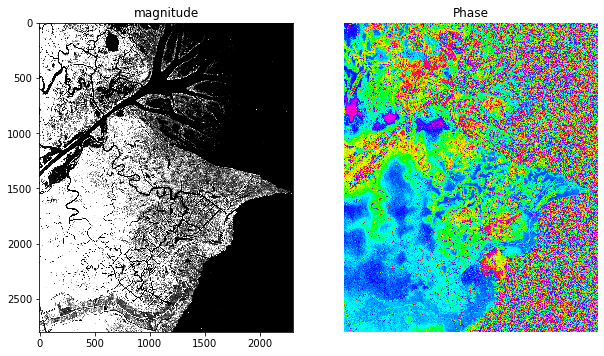

In [9]:
## IFG Plots

fig = plt.figure(figsize=(10, 14))

ax = fig.add_subplot(1,2,1)
ax.imshow(np.abs(igram), vmin = 0 , vmax = 10.0, cmap = 'gray')
ax.set_title("magnitude")
#ax.set_axis_off()

ax = fig.add_subplot(1,2,2)
ax.imshow(np.angle(igram), cmap='hsv')
ax.set_title("Phase")
ax.set_axis_off()

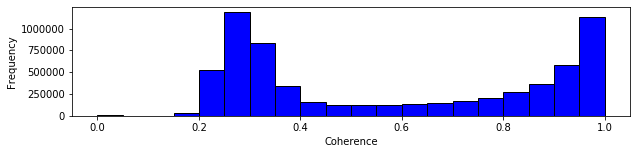

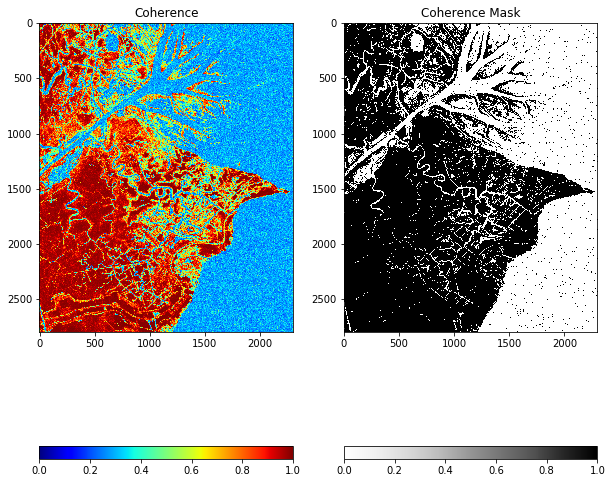

In [10]:
## Coherence plots

# Plots
# Histogram plots
fig = plt.figure(figsize=(10, 2))

ax = fig.add_subplot(1,1,1)
cax = ax.hist(coh.ravel(), bins=20, range=(0.0, 1.0), fc='b', ec='k')
plt.xlabel('Coherence'); plt.ylabel('Frequency')

fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow(coh, vmin = 0 , vmax = 1.0, cmap = 'jet')
ax.set_title("Coherence")
#ax.set_axis_off()
cbar = fig.colorbar(cax,orientation='horizontal')

ax = fig.add_subplot(1,2,2)
cax = ax.imshow(wmask, vmin = 0 , vmax = 1.0, cmap = 'Greys')
ax.set_title("Coherence Mask")
#ax.set_axis_off()
cbar = fig.colorbar(cax,orientation='horizontal')


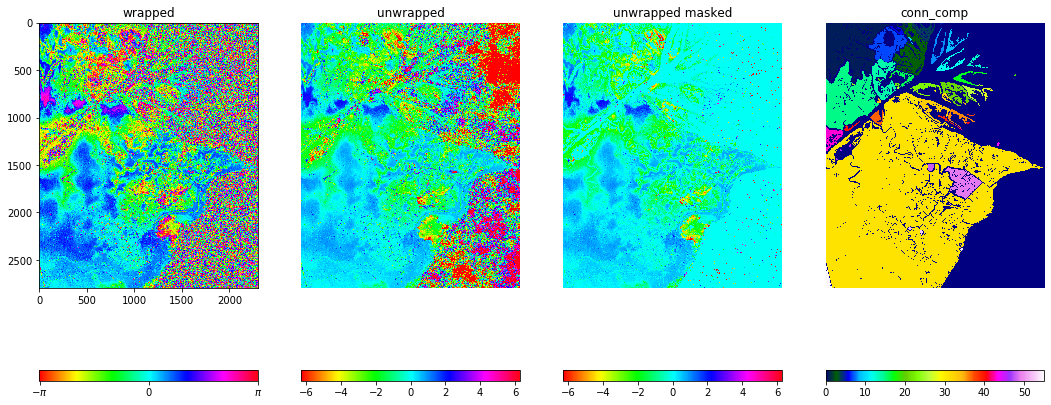

In [11]:
## Unwrapped interferogram plots

fig = plt.figure(figsize=(18, 10))

ax = fig.add_subplot(1,4,1)
cax=ax.imshow(np.angle(igram), cmap='hsv')
ax.set_title("wrapped")
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,4,2)
#cax = ax.imshow(igram_unw, cmap = 'hsv')
cax = ax.imshow(igram_unw, vmin = -6.28, vmax = 6.28, cmap = 'hsv')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

ax = fig.add_subplot(1,4,3)
#cax = ax.imshow(igram_unw*wmask, cmap = 'hsv')
cax = ax.imshow(igram_unw*wmask, vmin = -6.28, vmax = 6.28, cmap = 'hsv')
ax.set_title("unwrapped masked")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

ax = fig.add_subplot(1,4,4)
cax = ax.imshow(connected_components, cmap = 'gist_ncar')
ax.set_title("conn_comp")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')


In [12]:
## Read geocoded mintpy products
ds = gdal.Open('mintpy/geo/geo_wrapPhase-20150508T1134_20150508T1353.int', gdal.GA_ReadOnly)
geo_igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

ds = gdal.Open("mintpy/geo/geo_unwrapPhase-20150508T1134_20150508T1353.unw", gdal.GA_ReadOnly)
geo_igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

ds = gdal.Open("mintpy/geo/geo_vert_disp_cm-20150508T1134_20150508T1353_seeded.tif", gdal.GA_ReadOnly)
disp = ds.GetRasterBand(1).ReadAsArray()
ds = None

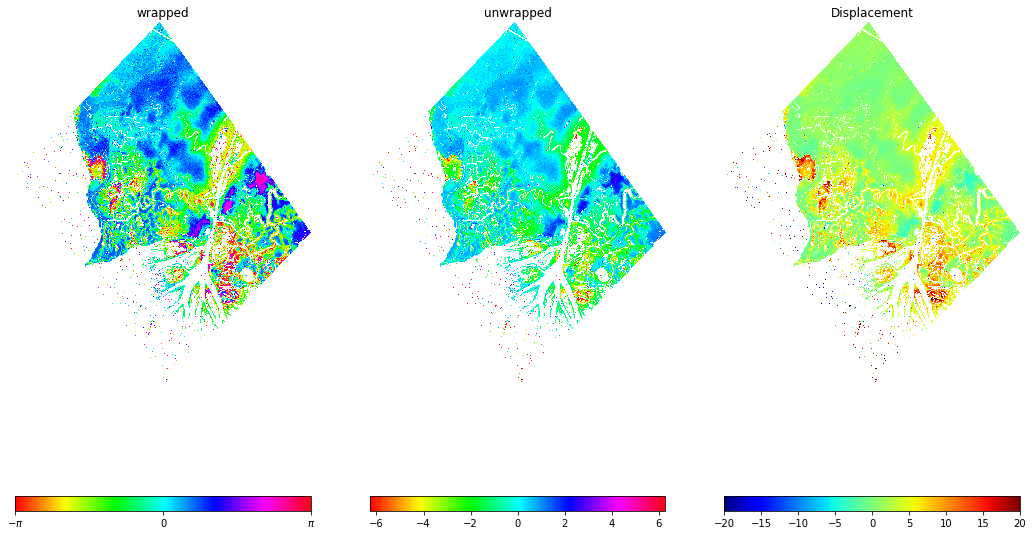

In [13]:
## Geocoded products plots
fig = plt.figure(figsize=(18, 14))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(geo_igram), cmap='hsv')
ax.set_title("wrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(geo_igram_unw, vmin = -6.28, vmax = 6.28, cmap = 'hsv')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

ax = fig.add_subplot(1,3,3)
cax = ax.imshow(disp, vmin = -20.0, vmax = 20.0, cmap = 'jet')
ax.set_title("Displacement")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

(2800, 2300)


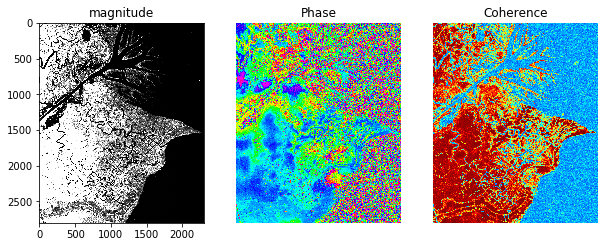

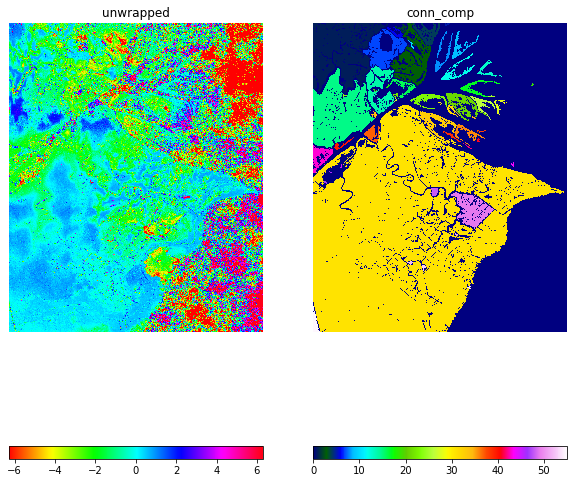

In [6]:
## Plot examples for a file that is not gdal compatible. 

unwrapFile = "Igram/20150508T1134_20150508T1353/non_isce_ifg.unw"
conncompFile = "Igram/20150508T1134_20150508T1353/non_isce_ifg.unw.conncomp"
intFile = "Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.int"
corFile = "Igram/20150508T1134_20150508T1353/filt_20150508T1134_20150508T1353.cor"

width = 2300
length = 2800

## Read files
X1 = np.memmap(unwrapFile, dtype=np.float32)
unwfile = X1.reshape((length, width)) ## multi-band example
X1 = None

X1 = np.memmap(conncompFile, dtype=np.uint8)
conn = X1.reshape((length,width))
X1 = None

X1 = np.memmap(intFile, dtype=np.complex64)
wrapfile = X1.reshape((length,width))
X1 = None

X1 = np.memmap(corFile, dtype=np.float32)
cofile = X1.reshape((length,width))
X1 = None

## Verify the shape of files that have multi-bands 
print(unwfile.shape)

## IFG Plots

fig = plt.figure(figsize=(10, 14))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(wrapfile), vmin = 0 , vmax = 10.0, cmap = 'gray')
ax.set_title("magnitude")
#ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(wrapfile), cmap='hsv')
ax.set_title("Phase")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
cax = ax.imshow(cofile, vmin = 0 , vmax = 1.0, cmap = 'jet')
ax.set_title("Coherence")
ax.set_axis_off()
#cbar = fig.colorbar(cax,orientation='horizontal')


fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow(unwfile, vmin = -6.28, vmax = 6.28, cmap = 'hsv')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')

ax = fig.add_subplot(1,2,2)
cax = ax.imshow(conn, cmap = 'gist_ncar')
ax.set_title("conn_comp")
ax.set_axis_off()
cbar = fig.colorbar(cax, orientation='horizontal')